In [1]:
import requests as r
import numpy as np
import pandas as pd
import json

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 

# Visualisation of TMDB data

In [3]:
moviedata = pd.read_csv('full-movie-dataset.csv')
moviedata = moviedata.drop(columns = "Unnamed: 0")
moviedata

,title,id,popularity,release_date,original_language,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,budget,revenue,genres,year_released,decade_released,vote_count,vote_average
0,Avengers: Endgame,299534,283.822,2019-04-24,en,30.39520,755.450,47.613,9.4208,473.269,9.929,356000000.0,2.797801e+09,"['Adventure', 'Science Fiction', 'Action']",2019.0,2010s,17799,8.3
1,Avatar,19995,102.112,2009-12-10,en,10.26480,108.804,13.136,4.0792,878.826,4.413,237000000.0,2.787965e+09,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2009.0,2000s,23178,7.5
2,Titanic,597,86.808,1997-11-18,en,11.95260,201.581,25.466,4.2744,122.649,4.413,200000000.0,2.187464e+09,"['Drama', 'Romance']",1997.0,1990s,18982,7.9
3,Star Wars: The Force Awakens,140607,53.930,2015-12-15,en,16.01320,391.303,23.880,5.7828,235.947,11.482,245000000.0,2.068224e+09,"['Action', 'Adventure', 'Science Fiction', 'Fa...",2015.0,2010s,15675,7.4
4,Avengers: Infinity War,299536,299.524,2018-04-25,en,30.39520,528.712,47.613,7.7592,501.005,9.929,300000000.0,2.046240e+09,"['Adventure', 'Action', 'Science Fiction']",2018.0,2010s,21489,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"Madrid, Costa Fleming",446100,1.340,1976-04-26,es,1.85740,38.620,2.548,0.6948,7.074,0.980,NaN,3.325280e+05,['Comedy'],1976.0,1970s,0,0.0
9996,El crack cero,613092,5.124,2019-10-04,es,1.57940,23.391,1.960,1.6264,11.732,1.788,NaN,3.323560e+05,"['Drama', 'Thriller']",2019.0,2010s,20,7.0
9997,Private Resort,17824,10.694,1985-05-03,en,9.65500,61.643,31.784,1.3696,14.068,1.620,NaN,3.318160e+05,['Comedy'],1985.0,1980s,145,5.7
9998,Salome's Last Dance,70842,6.976,1988-05-06,en,1.67580,32.035,2.250,1.6156,42.472,1.960,NaN,3.314690e+05,['Drama'],1988.0,1980s,19,6.5


### Numerical data

We first look at the numerical data,

In [4]:
numericalmoviedata = moviedata[["popularity","top_casts_popularity_avg", "casts_popularity_sum", "top_cast_popularity","top_crews_popularity_avg","crews_popularity_sum","top_crew_popularity","budget","revenue","vote_count","vote_average"]]

Our variables range from the popularity of the movie, the popularity of top casts, the popularity of the top crew to the vote count and vote average a particular movie receives. Popularity of movie, casts and crew were taken as they may be variables that could predict if a movie is good, for example, the crew, such as the director, is more popular as they were able to win a movie award such as an Oscar which attributes to a "good" movie.

Let us look at the distribution of the following numerical variables,

In [5]:
numericalmoviedata.describe()

,popularity,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,budget,revenue,vote_count,vote_average
count,10000.000000,9937.000000,9937.000000,9937.000000,9916.000000,9916.000000,9916.000000,7.128000e+03,9.991000e+03,10000.000000,10000.000000
mean,18.925775,5.955439,60.376360,10.308269,2.179518,38.320034,3.794467,2.837645e+07,6.333984e+07,1161.289700,6.257140
std,115.802998,3.890732,48.661984,7.912062,1.722870,51.109207,4.382885,4.096597e+07,1.472867e+08,2380.504146,1.311898
min,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,1.000000e+00,3.300480e+05,0.000000,0.000000
25%,6.939000,2.756800,24.616000,4.573000,1.135000,10.039250,1.400000,4.000000e+06,2.963894e+06,51.000000,5.800000
50%,11.617000,5.322200,49.183000,8.488000,1.661600,20.858000,2.316000,1.400000e+07,1.329037e+07,276.000000,6.400000
75%,18.033500,8.296600,83.407000,13.354000,2.589850,44.076750,4.185000,3.500000e+07,5.479311e+07,1093.000000,7.000000
max,10755.513000,32.164000,755.450000,49.734000,31.270200,878.826000,49.734000,9.653130e+08,2.797801e+09,28803.000000,10.000000


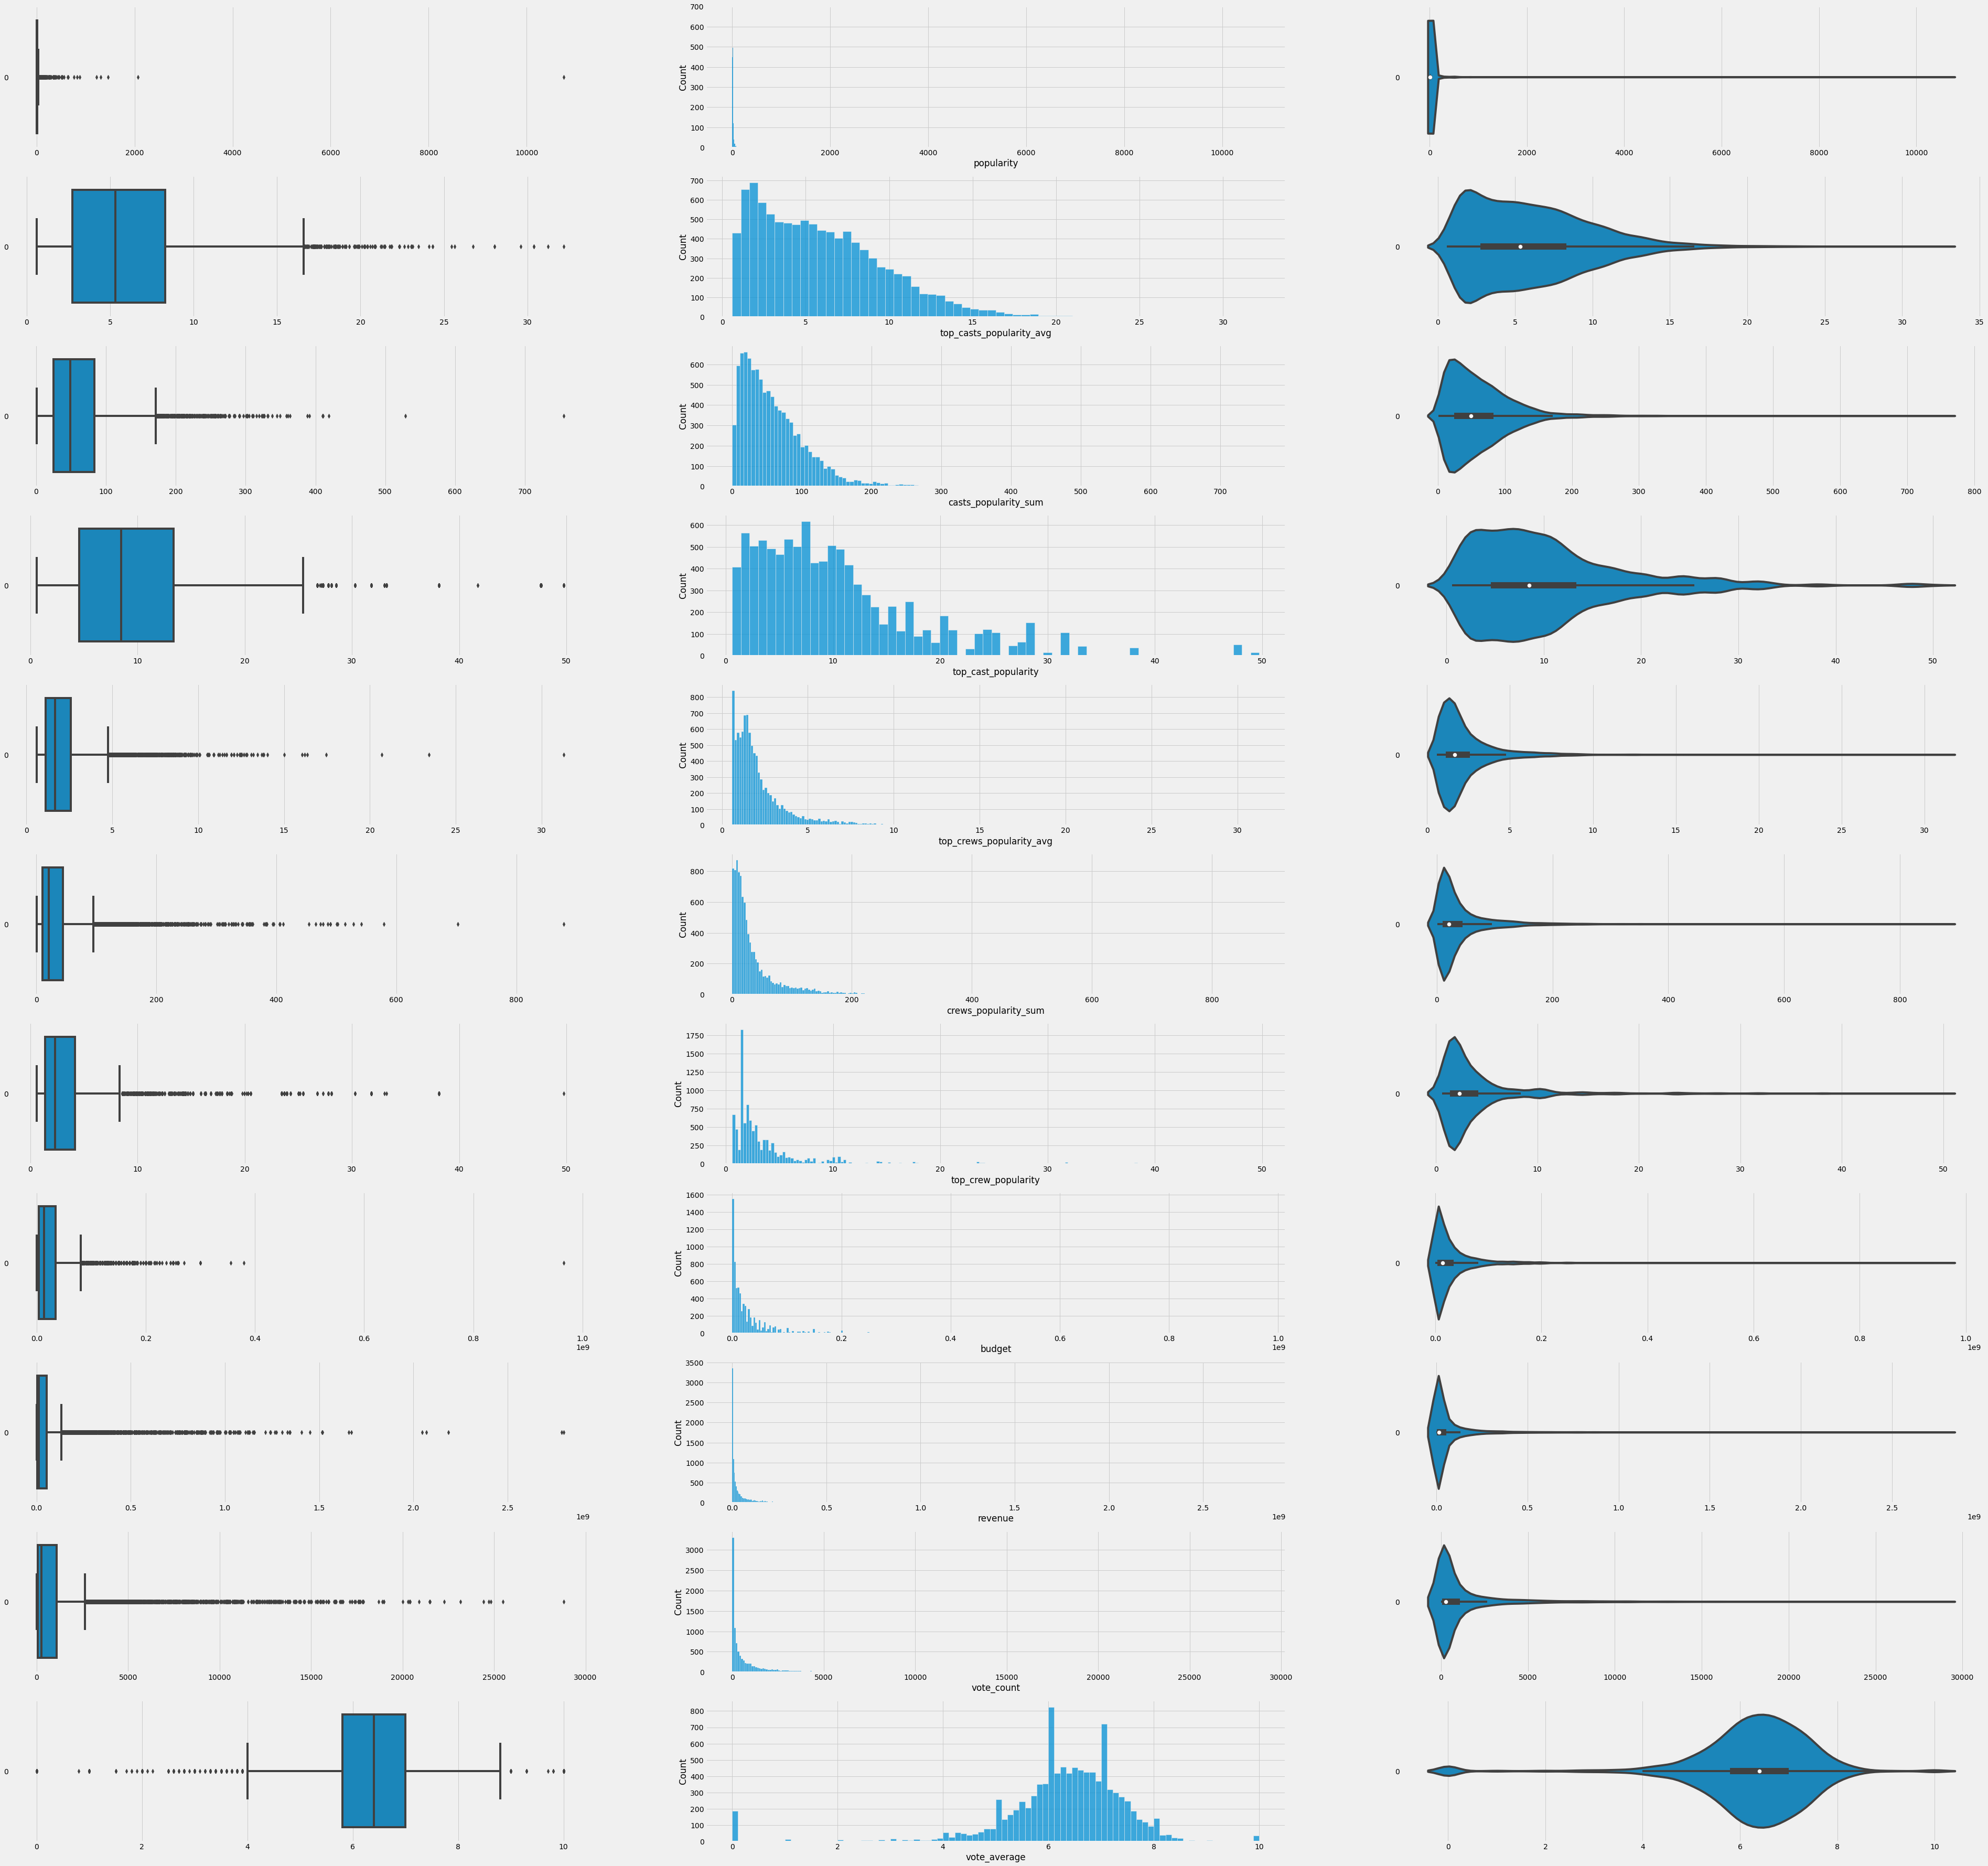

In [6]:
# Draw the distributions of all variables
f, axes = plt.subplots(11, 3, figsize=(60,60))

count = 0
for var in numericalmoviedata:
    sb.boxplot(data = numericalmoviedata[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numericalmoviedata[var], ax = axes[count,1])
    sb.violinplot(data = numericalmoviedata[var], orient = "h", ax = axes[count,2])
    count += 1

As seen from these graphs, most of the numerical values are quite skewed to the left, with vote_average having a distribution that most resembles normal distribution

Here is the distribution of vote_average alone as it is our most important variable as it is our indicator if a movie is "good"

In [7]:
numericalmoviedata["vote_average"].describe()

count    10000.000000
mean         6.257140
std          1.311898
min          0.000000
25%          5.800000
50%          6.400000
75%          7.000000
max         10.000000
Name: vote_average, dtype: float64

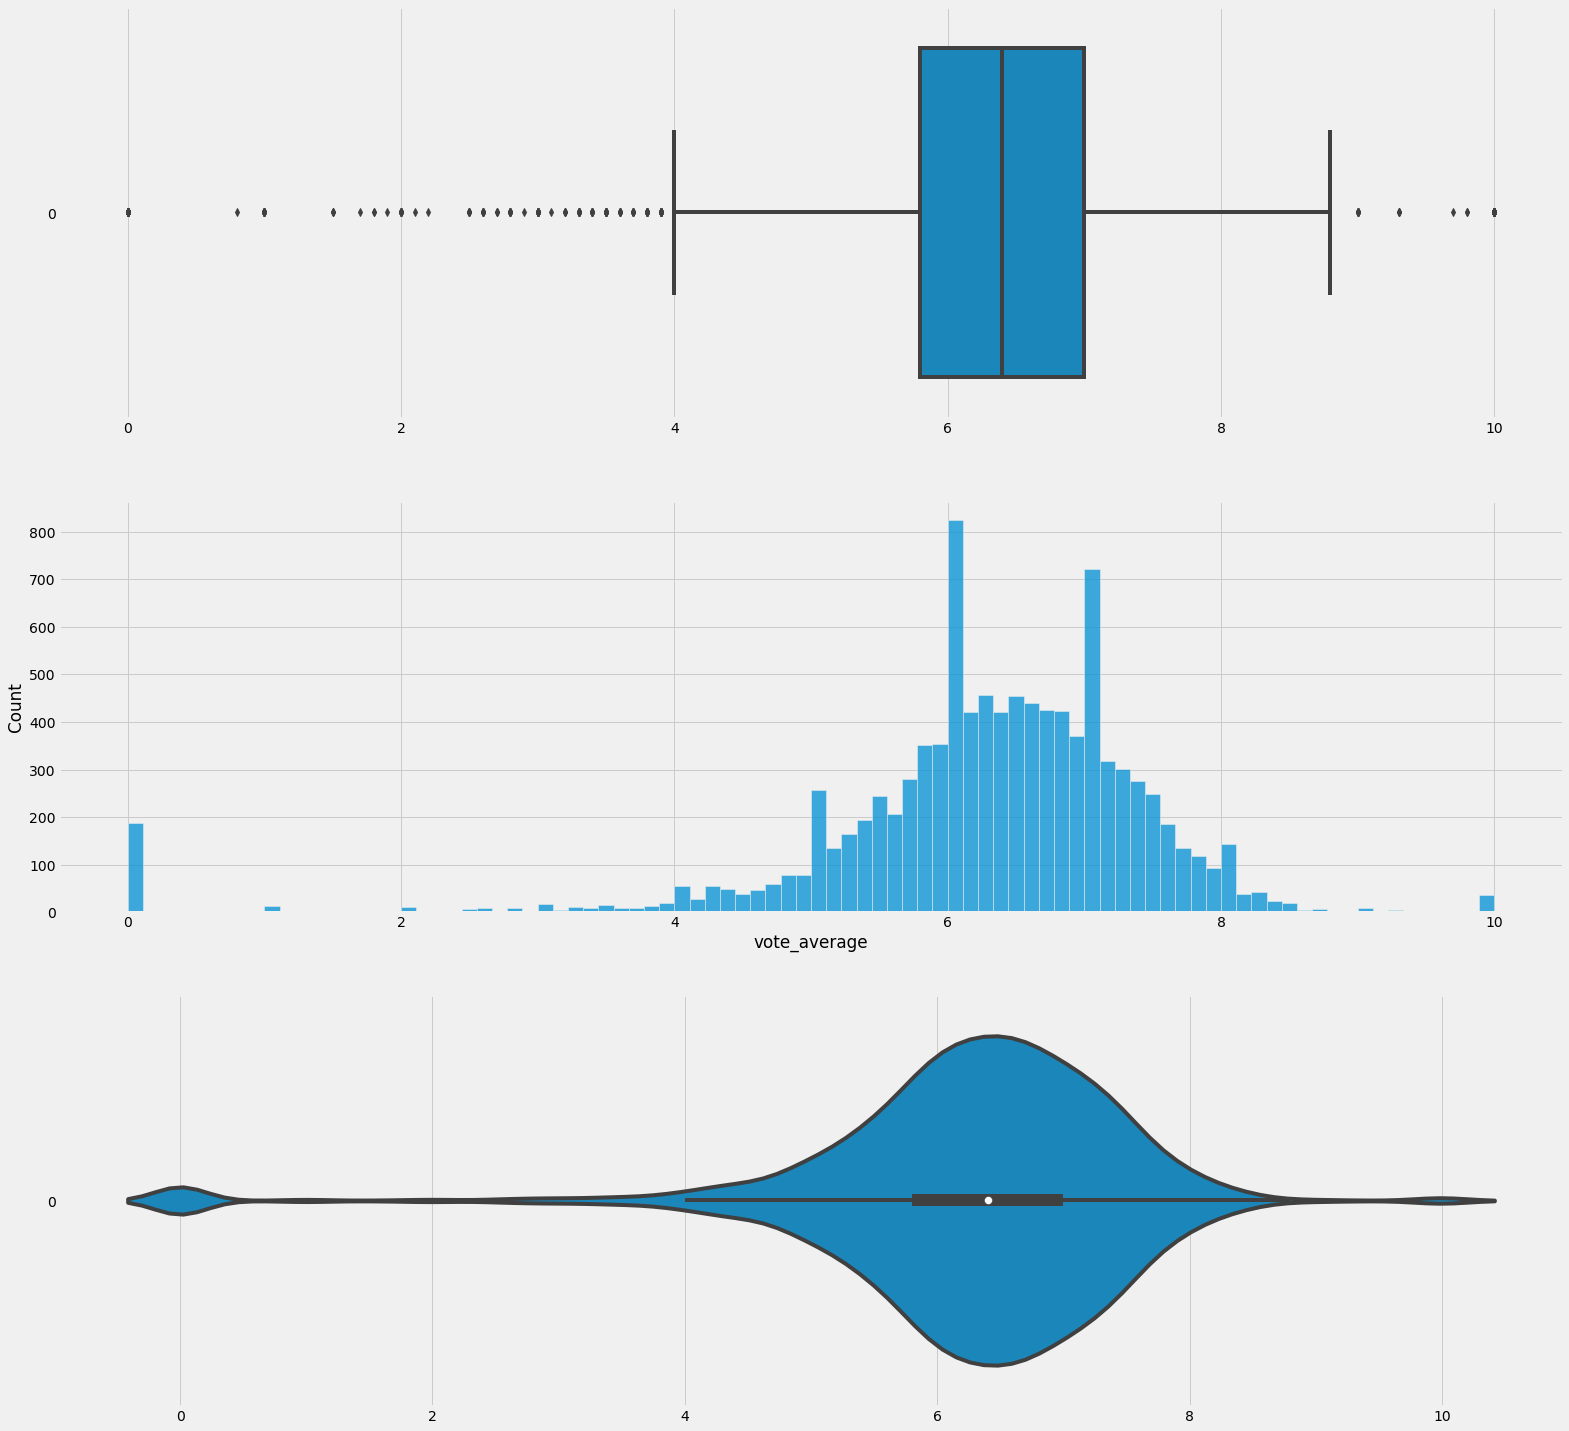

In [8]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = numericalmoviedata["vote_average"], orient = "h", ax = axes[0])
sb.histplot(data = numericalmoviedata["vote_average"],ax = axes[1])
sb.violinplot(data = numericalmoviedata["vote_average"], orient = "h", ax = axes[2])

We indicate if a movie is "good" if the vote average of the movie is above 7.2 as 7.2 is its 80th percentile value, so we wanted a 'good' movie to rate higher than its 80th percentile value.

In [9]:
np.percentile(numericalmoviedata["vote_average"],80)

7.2

In [10]:
(numericalmoviedata["vote_average"] > 7.2).value_counts()

False    8310
True     1690
Name: vote_average, dtype: int64

Then, we look for the correlation between our numerical data,

In [11]:
numericalmoviedata.corr()

,popularity,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,budget,revenue,vote_count,vote_average
popularity,1.000000,0.138765,0.123259,0.121319,0.096213,0.114501,0.070705,0.133320,0.118795,0.124625,0.062613
top_casts_popularity_avg,0.138765,1.000000,0.863104,0.904736,0.530938,0.536248,0.436738,0.568596,0.468653,0.525457,0.172501
casts_popularity_sum,0.123259,0.863104,1.000000,0.710056,0.532586,0.579218,0.402657,0.610704,0.581243,0.605695,0.198156
top_cast_popularity,0.121319,0.904736,0.710056,1.000000,0.466193,0.444654,0.408156,0.455864,0.368303,0.425582,0.146205
top_crews_popularity_avg,0.096213,0.530938,0.532586,0.466193,1.000000,0.570699,0.872467,0.395673,0.383855,0.472829,0.184221
crews_popularity_sum,0.114501,0.536248,0.579218,0.444654,0.570699,1.000000,0.423517,0.587318,0.582729,0.638319,0.168103
top_crew_popularity,0.070705,0.436738,0.402657,0.408156,0.872467,0.423517,1.000000,0.291767,0.264596,0.323972,0.125700
budget,0.133320,0.568596,0.610704,0.455864,0.395673,0.587318,0.291767,1.000000,0.705336,0.567199,0.081502
revenue,0.118795,0.468653,0.581243,0.368303,0.383855,0.582729,0.264596,0.705336,1.000000,0.764914,0.151333
vote_count,0.124625,0.525457,0.605695,0.425582,0.472829,0.638319,0.323972,0.567199,0.764914,1.000000,0.264034


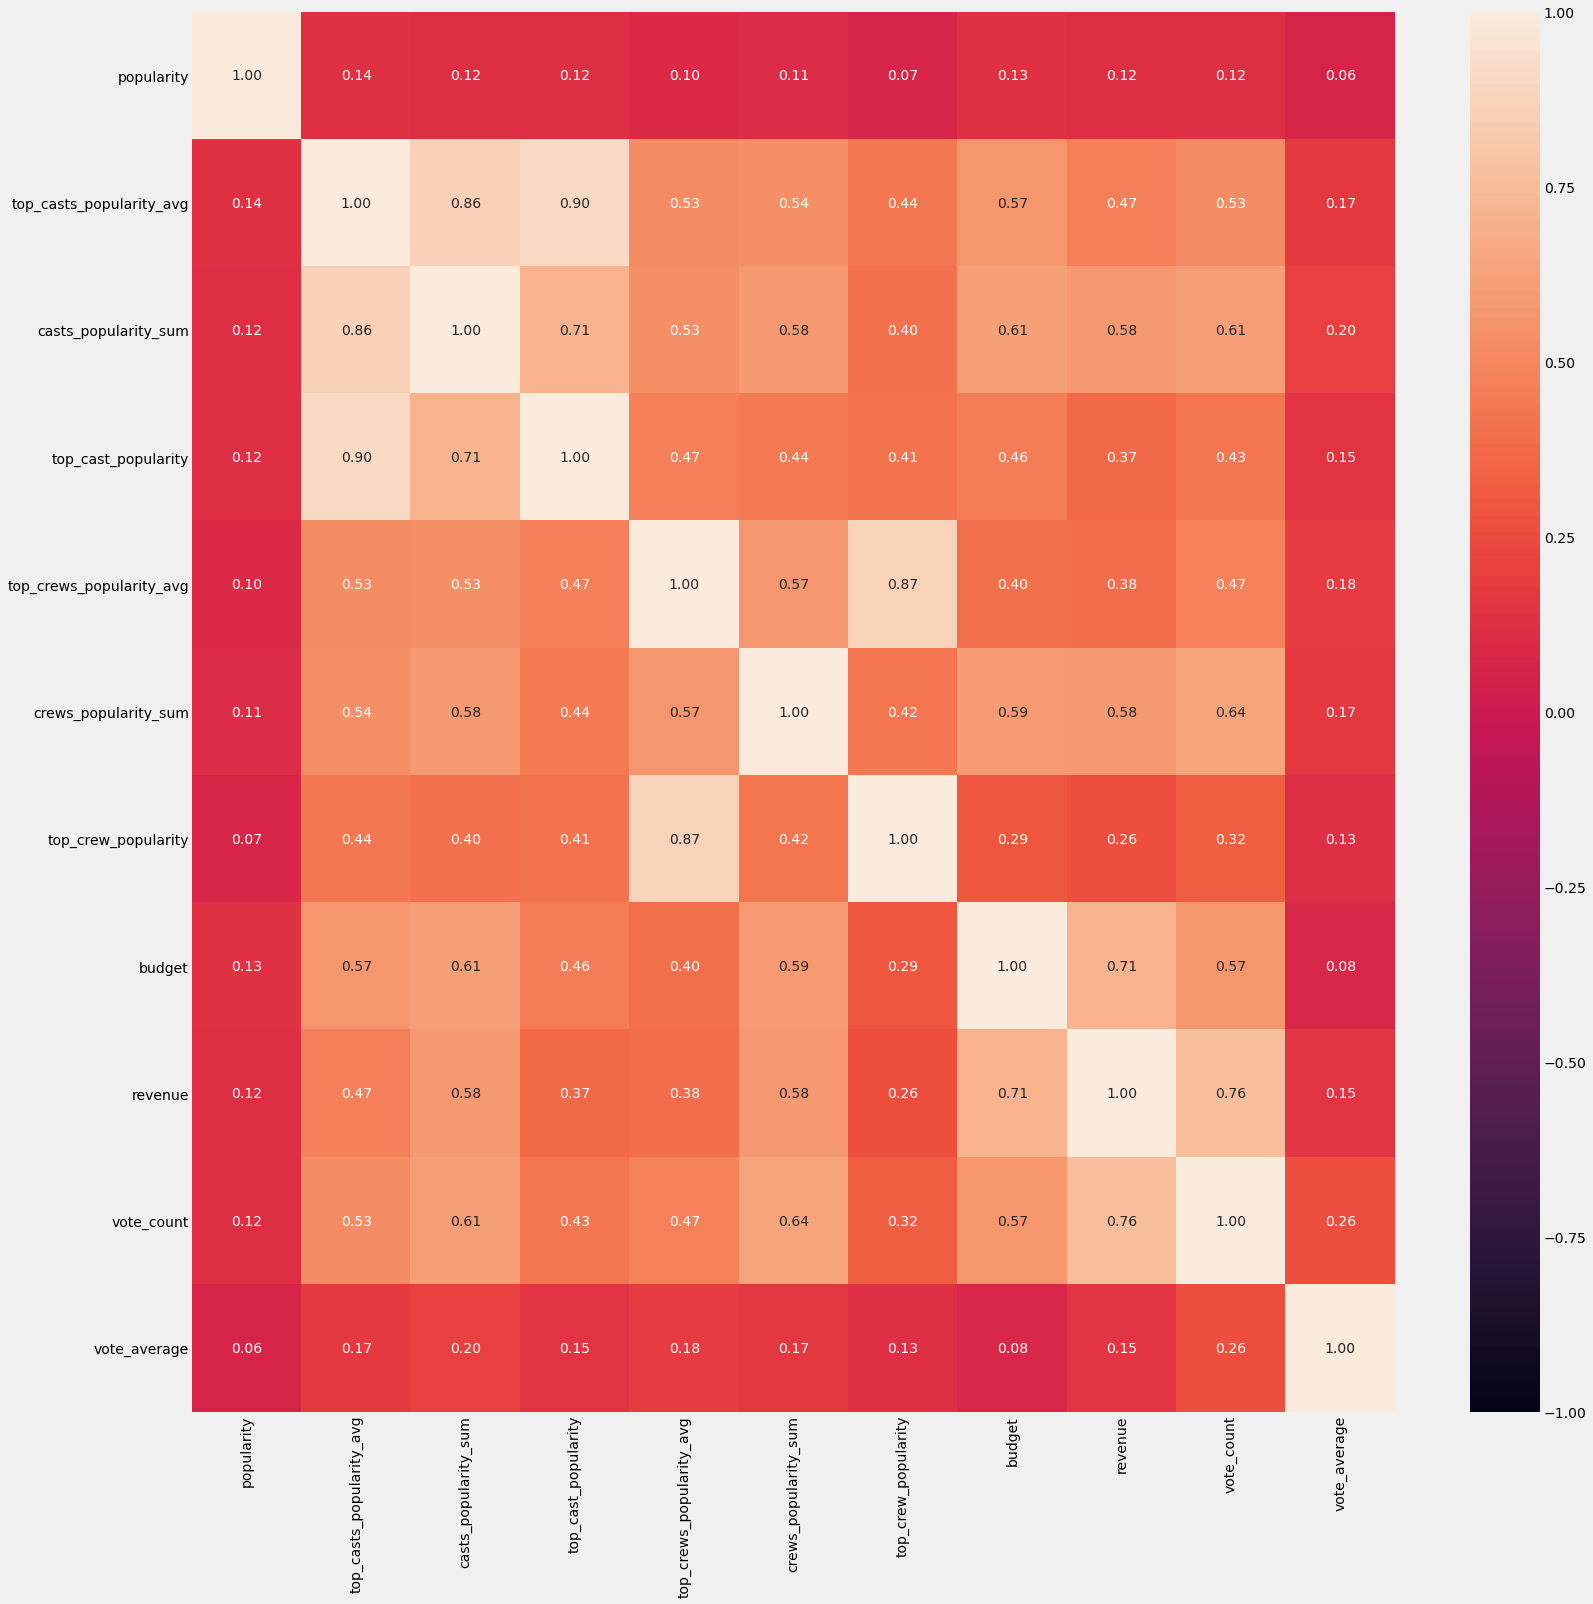

In [12]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(24,24))
sb.heatmap(numericalmoviedata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Seeing from the heatmap, the correlation between vote average and all the other numerical data have a low correlation, with all of their correlation being below 0.3, with vote_count having the highest at 0.26. This shows that all the variables have a low linear correlation against vote_average. So, they have a poor linear relationship. However, this may mean that they may be non-linear relationship. So, we shall also explore non-linear models.

So, let us look at their various scatterplots,

In [ ]:
sb.pairplot(data = numericalmoviedata, corner = True)

Specifically for vote_average against the other numerical variables

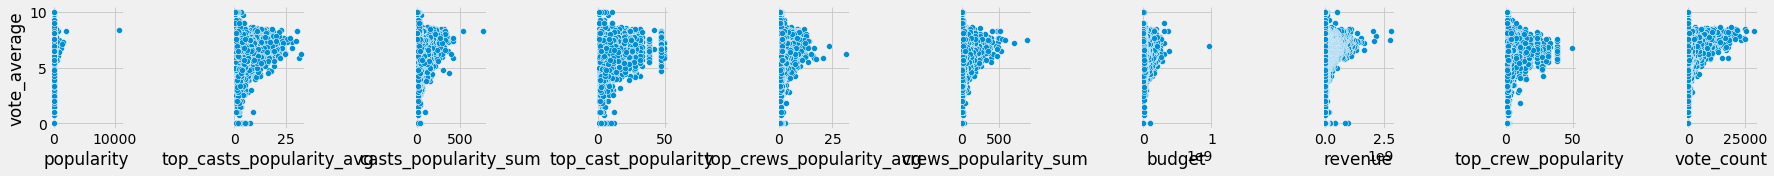

In [14]:
sb.pairplot(data=numericalmoviedata,
                  y_vars=['vote_average'],
                  x_vars=['popularity', 'top_casts_popularity_avg', 'casts_popularity_sum', 'top_cast_popularity', 'top_crews_popularity_avg', 'crews_popularity_sum','budget','revenue', 
'top_crew_popularity', 'vote_count'])

### Categorical data

Then, let us look at some categorical data,

In [15]:
categoricalmoviedata = moviedata[["original_language","genres","decade_released","vote_average"]]
categoricalmoviedata

,original_language,genres,decade_released,vote_average
0,en,"['Adventure', 'Science Fiction', 'Action']",2010s,8.3
1,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2000s,7.5
2,en,"['Drama', 'Romance']",1990s,7.9
3,en,"['Action', 'Adventure', 'Science Fiction', 'Fa...",2010s,7.4
4,en,"['Adventure', 'Action', 'Science Fiction']",2010s,8.3
...,...,...,...,...
9995,es,['Comedy'],1970s,0.0
9996,es,"['Drama', 'Thriller']",2010s,7.0
9997,en,['Comedy'],1980s,5.7
9998,en,['Drama'],1980s,6.5


Categorical variables chosen here would be decade released, genres and original language.Decade released is used as the categorical variable for year released as using year released as a numerical data would be rather odd, since the median or average year released does not make sense. However, it would make more sense to think of year released as if they were genres, as 80s movies vs 00s movies have a certain style to them that is unique to them, that is why decade released is a categorical data. <br>Original language is chosen to represent where the movie may be from as people from English speaking countries would probably also watch English speaking movies even if it was not produced in their own country, so it would be hard to specify exactly which English speaking country the film is from.

In [16]:
categoricalmoviedata["decade_released"].value_counts()

2010s                  3639
2000s                  2689
1990s                  1542
1980s                  1057
1970s                   340
Movies before 1960s     328
1960s                   201
2020s                   157
Name: decade_released, dtype: int64

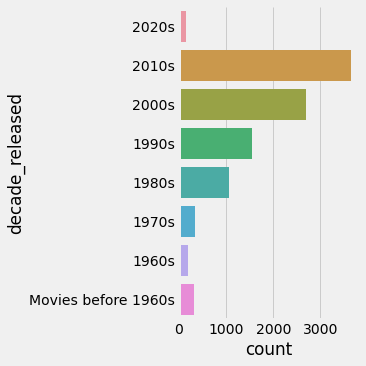

In [18]:
sb.catplot(y = "decade_released", data = categoricalmoviedata, kind = "count", order = ["2020s","2010s", "2000s", "1990s", "1980s", "1970s", "1960s", "Movies before 1960s"])

In [19]:
categoricalmoviedata["original_language"].value_counts()

en    7281
hi     308
fr     285
es     263
ja     254
ru     227
zh     170
it     129
ko     127
de     108
ta     106
ml     102
cn      81
ar      77
tr      65
te      53
sv      38
no      33
pt      31
nl      29
ur      27
kn      26
fa      22
da      20
tl      15
th      13
fi      10
he       9
pl       9
vi       7
ms       7
bn       7
cs       7
pa       6
uk       5
id       4
hu       4
mr       4
el       3
ro       3
sk       2
si       2
is       2
ka       2
lt       2
ca       1
nb       1
mn       1
az       1
mk       1
la       1
ku       1
et       1
ne       1
gl       1
gu       1
bg       1
km       1
be       1
af       1
Name: original_language, dtype: int64

There are many different languages found in this dataset, so we will only be looking at languages which was used by at least 30 movies so that it would be at least follow a normal distribution via central limit theorem.

In [20]:
morelanguage = categoricalmoviedata[categoricalmoviedata["original_language"].isin(["en","hi","fr","es","ja","ru","zh","it","ko","de","ta","ml","cn","ar","tr","te","sv","no","pt"])]

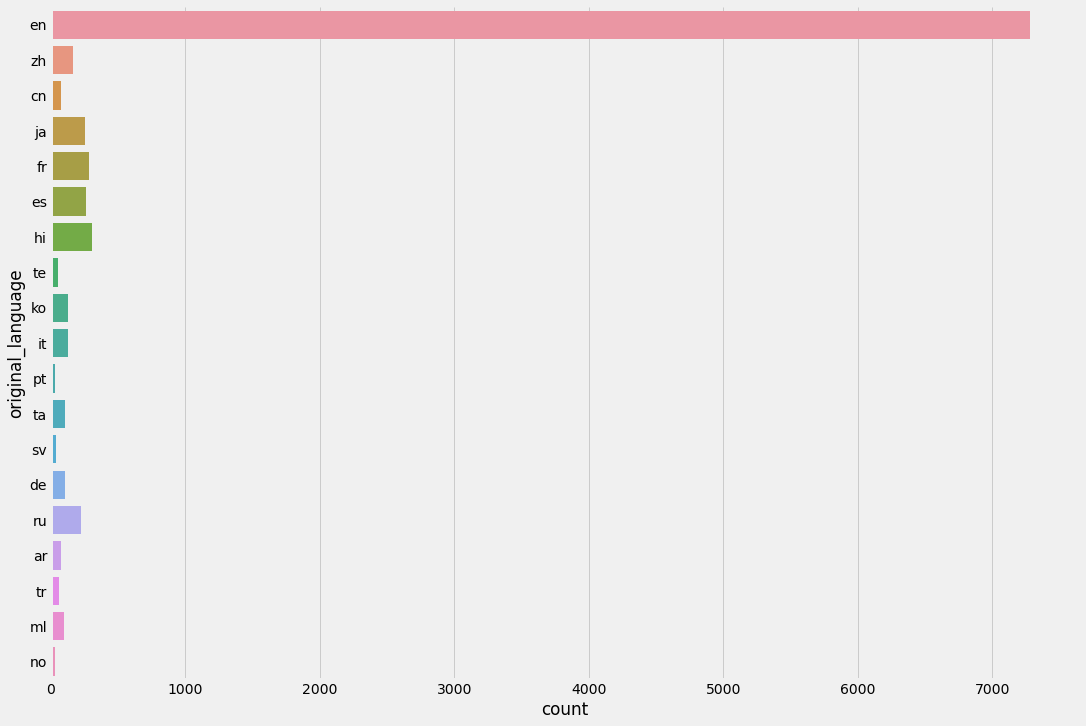

In [21]:
sb.catplot(y = "original_language", data = morelanguage, kind = "count", height= 10, aspect= 1.5)

Let us see these categorical variables against vote average,

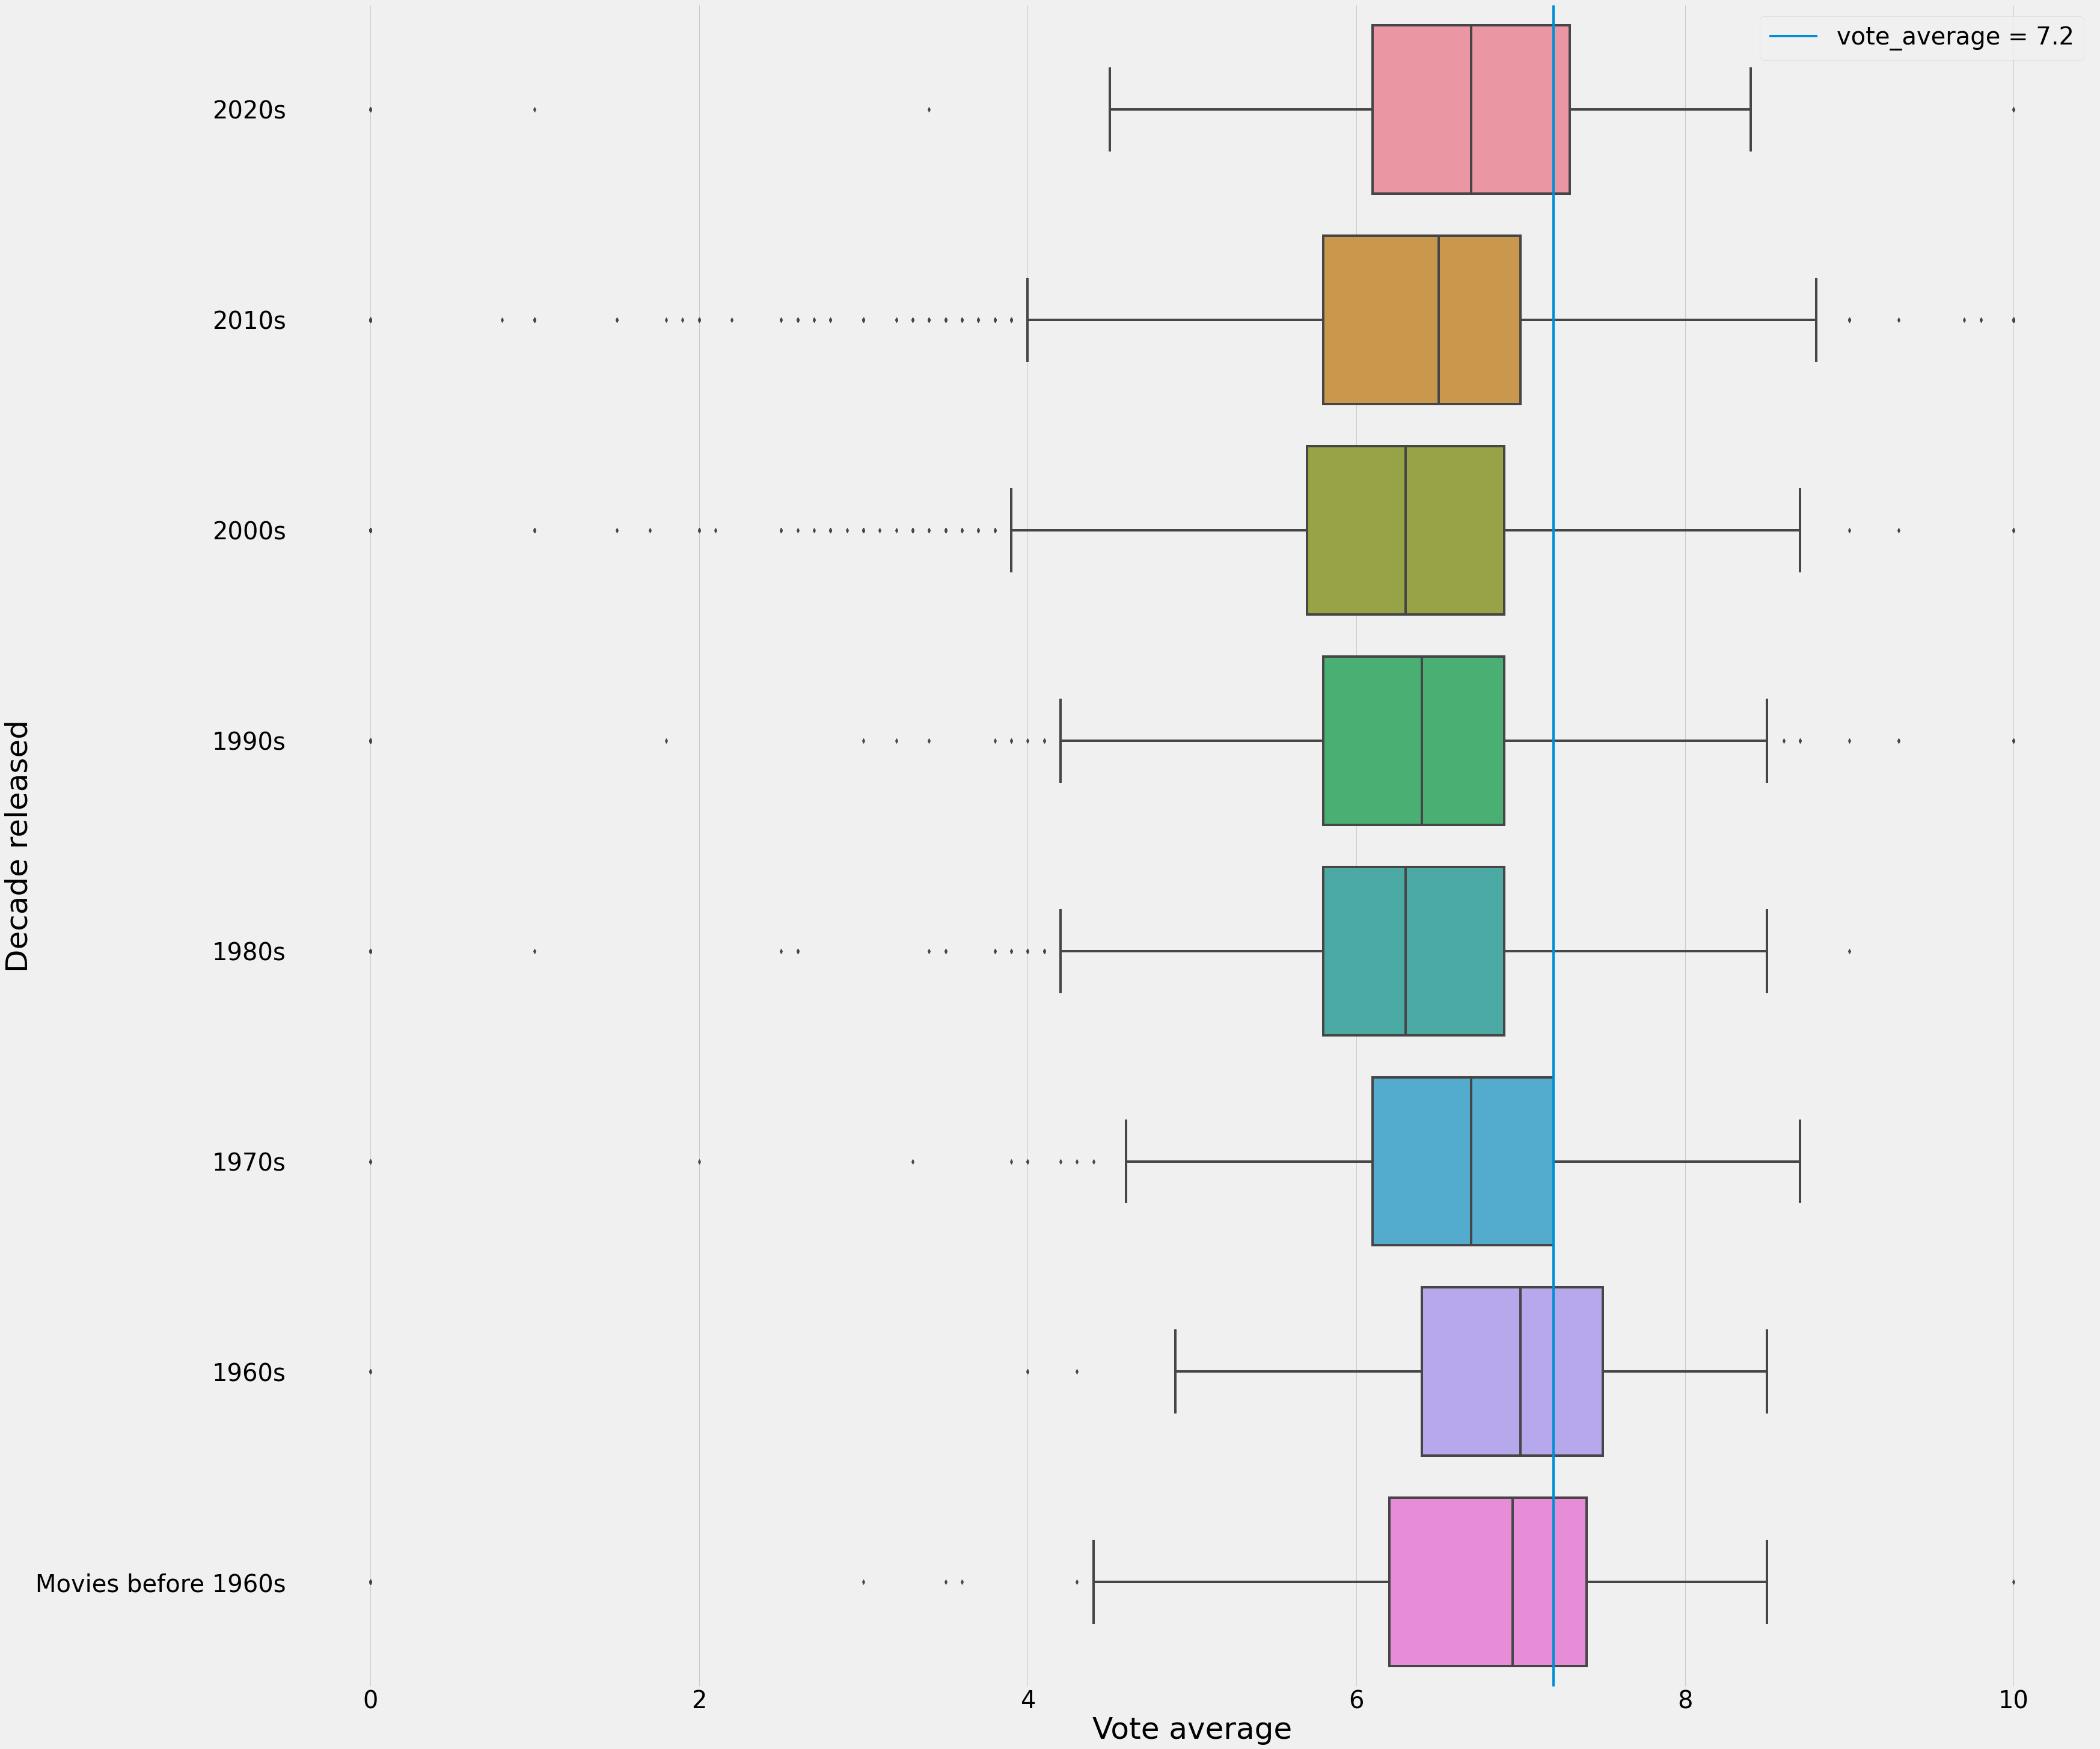

In [22]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "decade_released", data = categoricalmoviedata, orient = "h",order = ["2020s","2010s", "2000s", "1990s", "1980s", "1970s", "1960s", "Movies before 1960s"])
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Vote average",fontsize=50)
ax.set_ylabel("Decade released",fontsize=50)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=40)
plt.show()

Looking at these graphs, it would seem that older movies lead to a higher vote average than more recent movies, since older movies have a higher median than more recent movies.

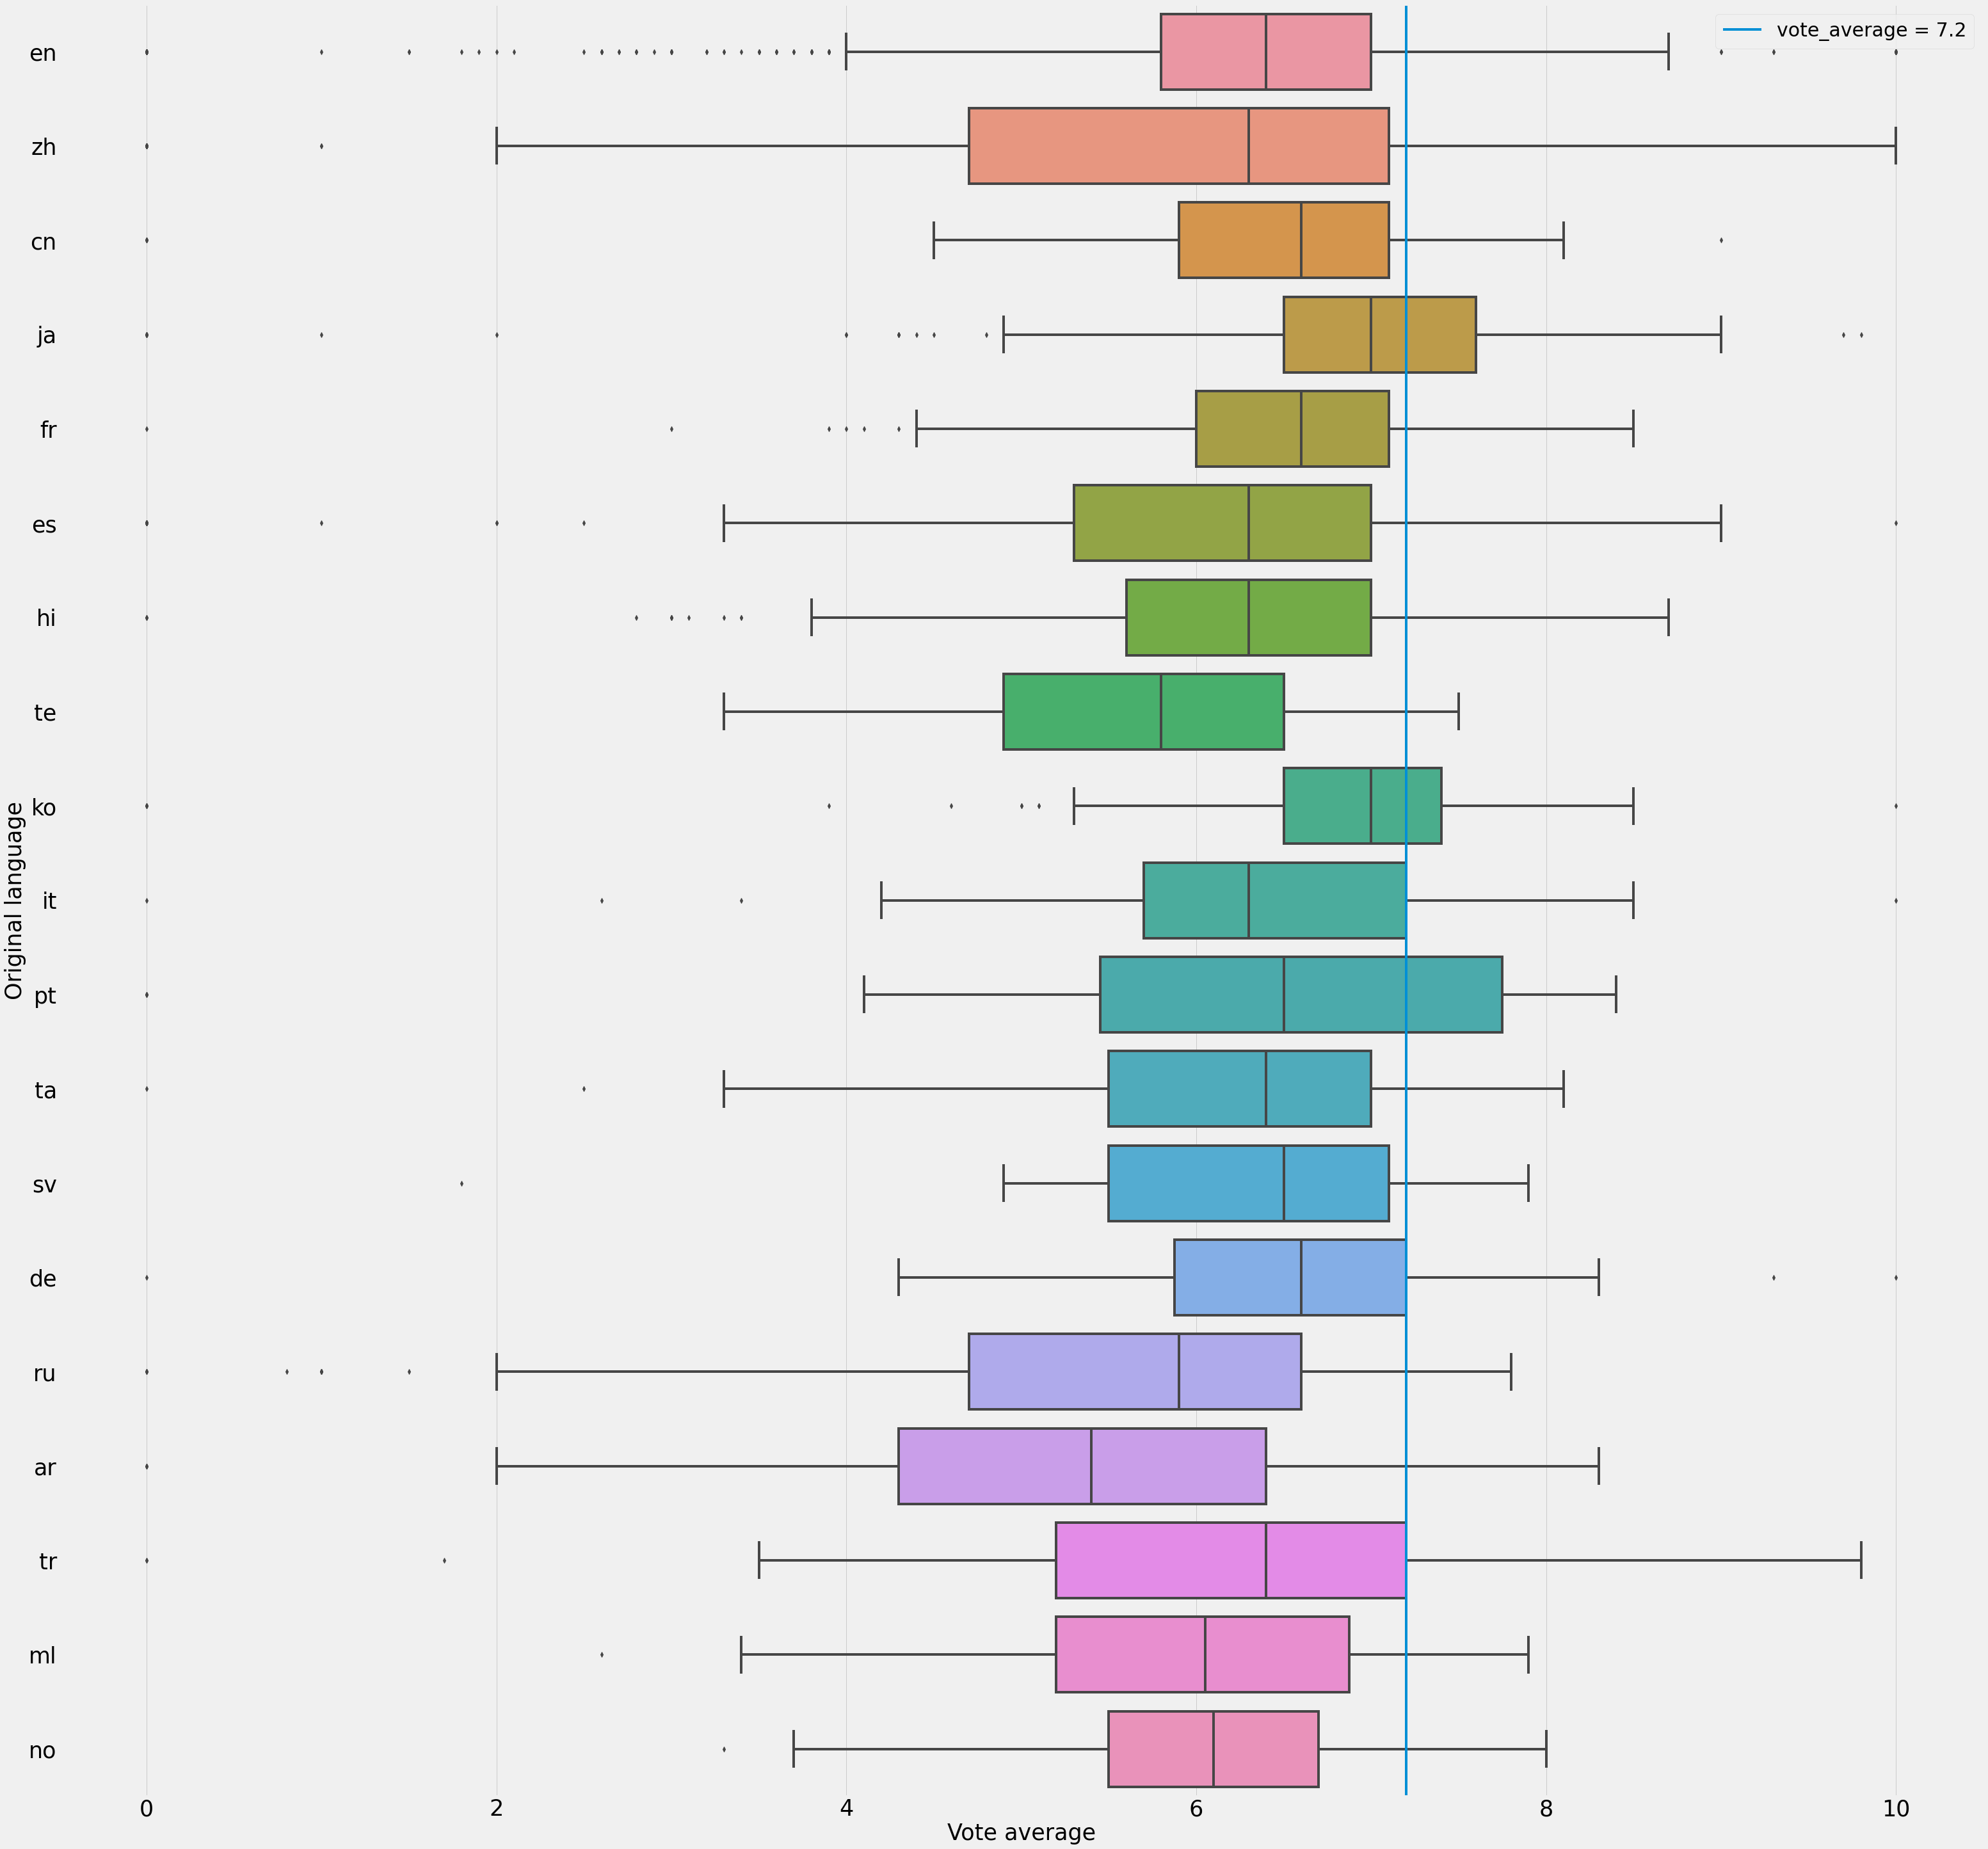

In [23]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "original_language", data = morelanguage, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("Vote average",fontsize=35)
ax.set_ylabel("Original language",fontsize=35)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=30)
plt.show()

Seeing from the data, it seems that korean and japanese seem to have a higher vote average than the others, with its median being the closest to 7.2.

In [24]:
API_KEY = 'db6bd34e31c99738cfb114ed7ad6d566'

Here are the genres that are available on TMDB,

In [25]:
genrelists = r.get(f"https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US")
genrelist = genrelists.json()['genres']
ids = {}
for i in genrelist:
    ids[i['name']] = 0
print(ids)

{'Action': 0, 'Adventure': 0, 'Animation': 0, 'Comedy': 0, 'Crime': 0, 'Documentary': 0, 'Drama': 0, 'Family': 0, 'Fantasy': 0, 'History': 0, 'Horror': 0, 'Music': 0, 'Mystery': 0, 'Romance': 0, 'Science Fiction': 0, 'TV Movie': 0, 'Thriller': 0, 'War': 0, 'Western': 0}


In [26]:
from ast import literal_eval
for eachmovie in categoricalmoviedata["genres"]:
    try:
        eachmovie = literal_eval(eachmovie)
    except:
        continue
    for index in range(len(eachmovie)):
        ids[eachmovie[index]] += 1

As some movies have multiple genres attached to it, the following graph is merely counting whenever a movie has a specific genre, so it counts the frequency of each individual genre.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

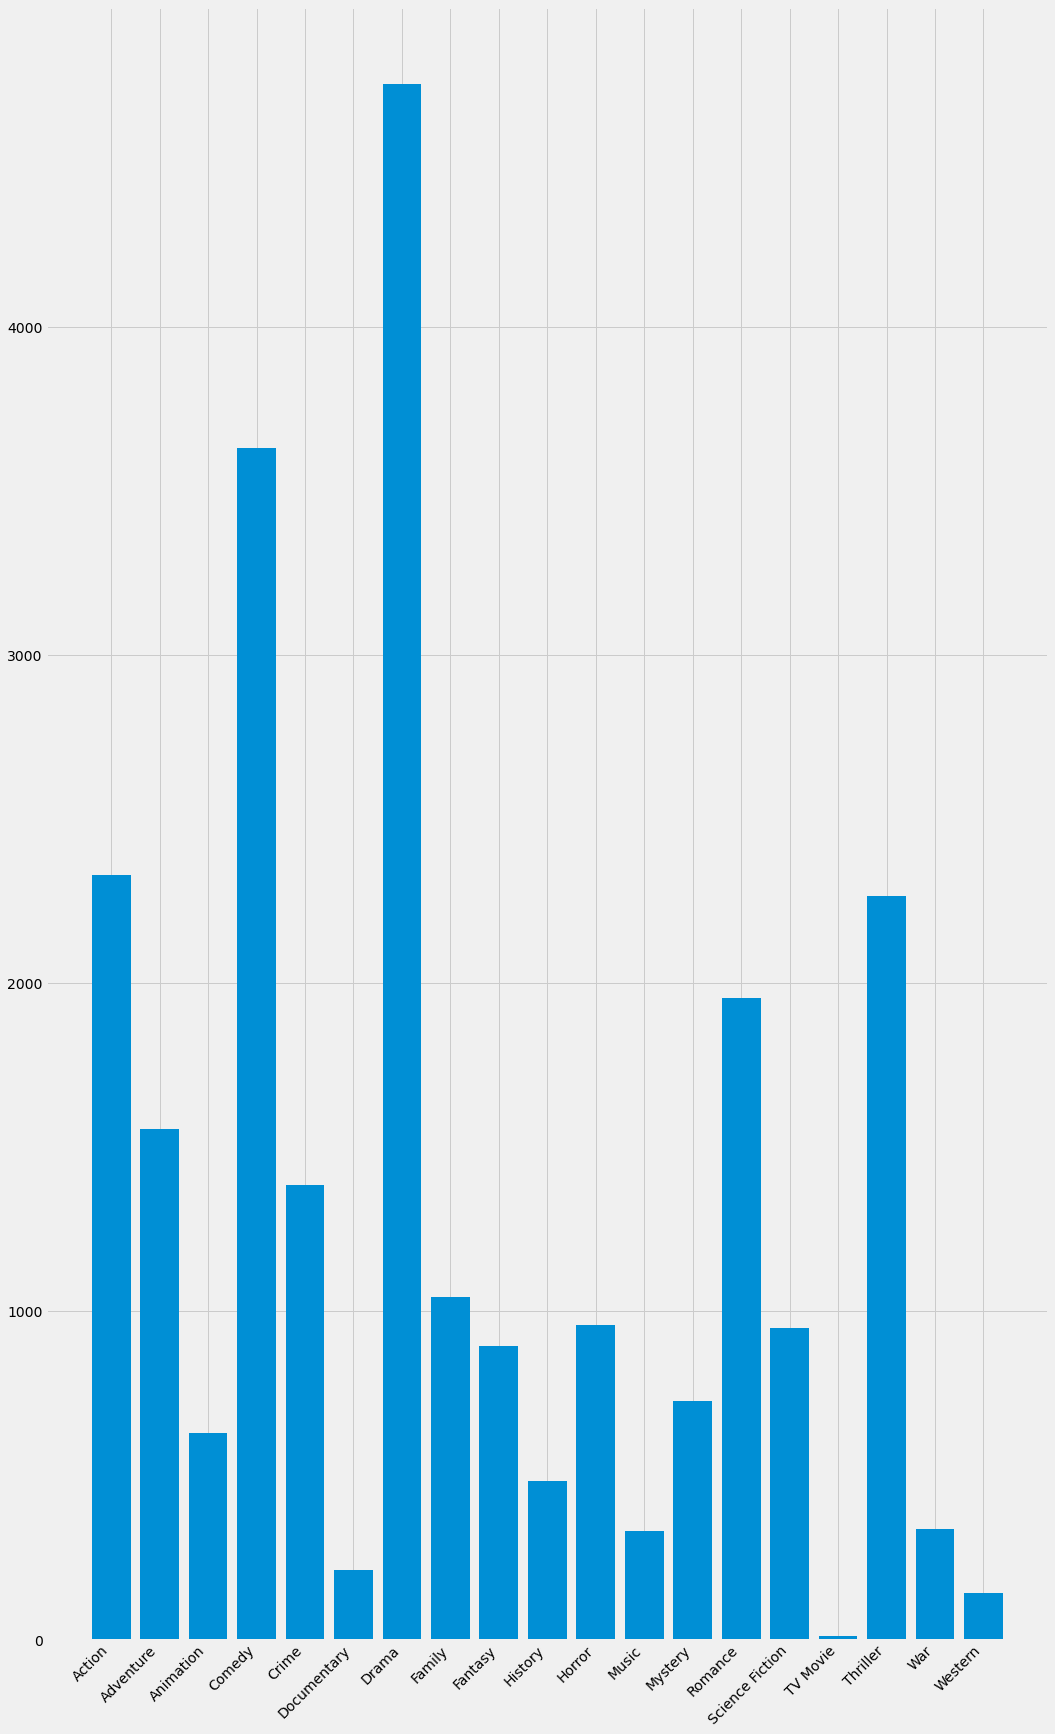

In [27]:
f,ax = plt.subplots(figsize=(16,28))
plt.bar(ids.keys(),ids.values())
plt.xticks(rotation = 45, ha = 'right')

So, the most frequent genres are Drama, Comedy and Action.

In [37]:
firstgenre = []
for eachmovie in categoricalmoviedata["genres"]:
    try:
        eachmovie = literal_eval(eachmovie)
        firstgenre.append(eachmovie[0])
    except:
        firstgenre.append(np.nan)
withfirstgenre = categoricalmoviedata.copy()
withfirstgenre["first_genre"] = firstgenre

In [38]:
withfirstgenre

,original_language,genres,decade_released,vote_average,first_genre
0,en,"['Adventure', 'Science Fiction', 'Action']",2010s,8.3,Adventure
1,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2000s,7.5,Action
2,en,"['Drama', 'Romance']",1990s,7.9,Drama
3,en,"['Action', 'Adventure', 'Science Fiction', 'Fa...",2010s,7.4,Action
4,en,"['Adventure', 'Action', 'Science Fiction']",2010s,8.3,Adventure
...,...,...,...,...,...
9995,es,['Comedy'],1970s,0.0,Comedy
9996,es,"['Drama', 'Thriller']",2010s,7.0,Drama
9997,en,['Comedy'],1980s,5.7,Comedy
9998,en,['Drama'],1980s,6.5,Drama


Since multiple genres are attached to one movie, it is quite difficult to see if the relationship between genre and vote average. So, in an attempt to see if there is a correlation between genre and vote average, the first genre in the list of genres was taken to compare, as the genres do not seem to be arranged in the alphabetical order or by the id order, so there may be another reason that the genres are arranged in such a way, with one reason being it was decided as the most relevant genre associated to the movie.

In [39]:
withfirstgenre["first_genre"].value_counts()

Drama              2424
Comedy             2248
Action             1474
Adventure           589
Horror              547
Crime               446
Thriller            393
Animation           336
Romance             293
Fantasy             215
Science Fiction     192
Family              169
Documentary         166
Mystery             108
Music                92
War                  75
History              68
Western              61
TV Movie              3
Name: first_genre, dtype: int64

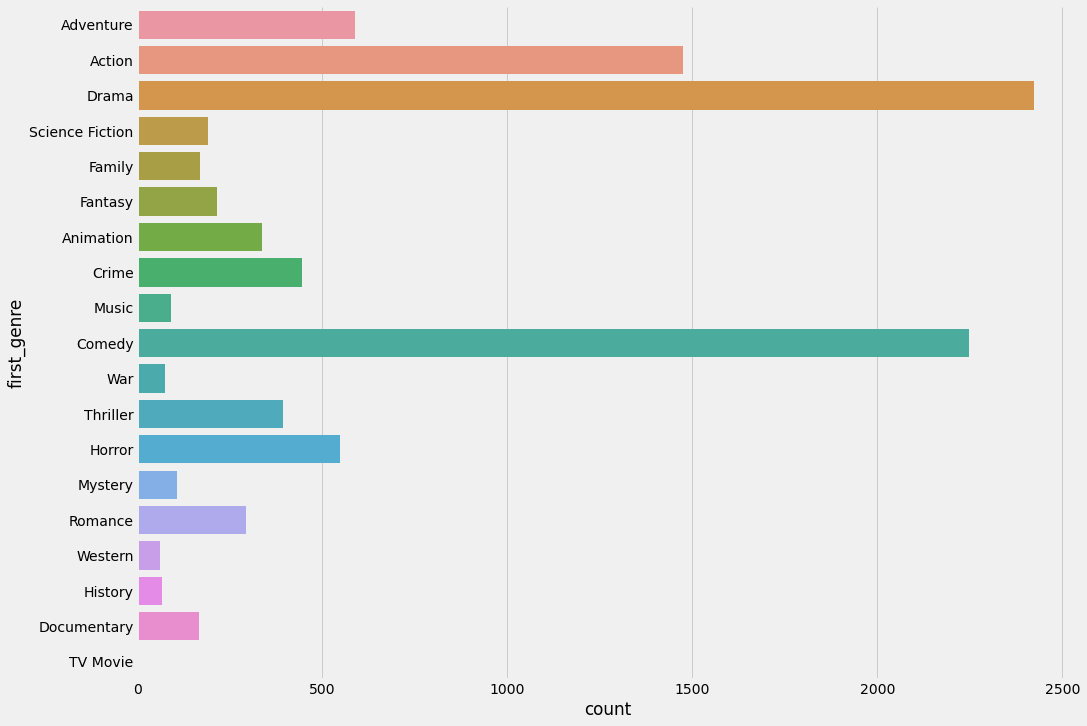

In [40]:
sb.catplot(y = "first_genre", data = categoricalmoviedata, kind = "count", height= 10, aspect= 1.5)

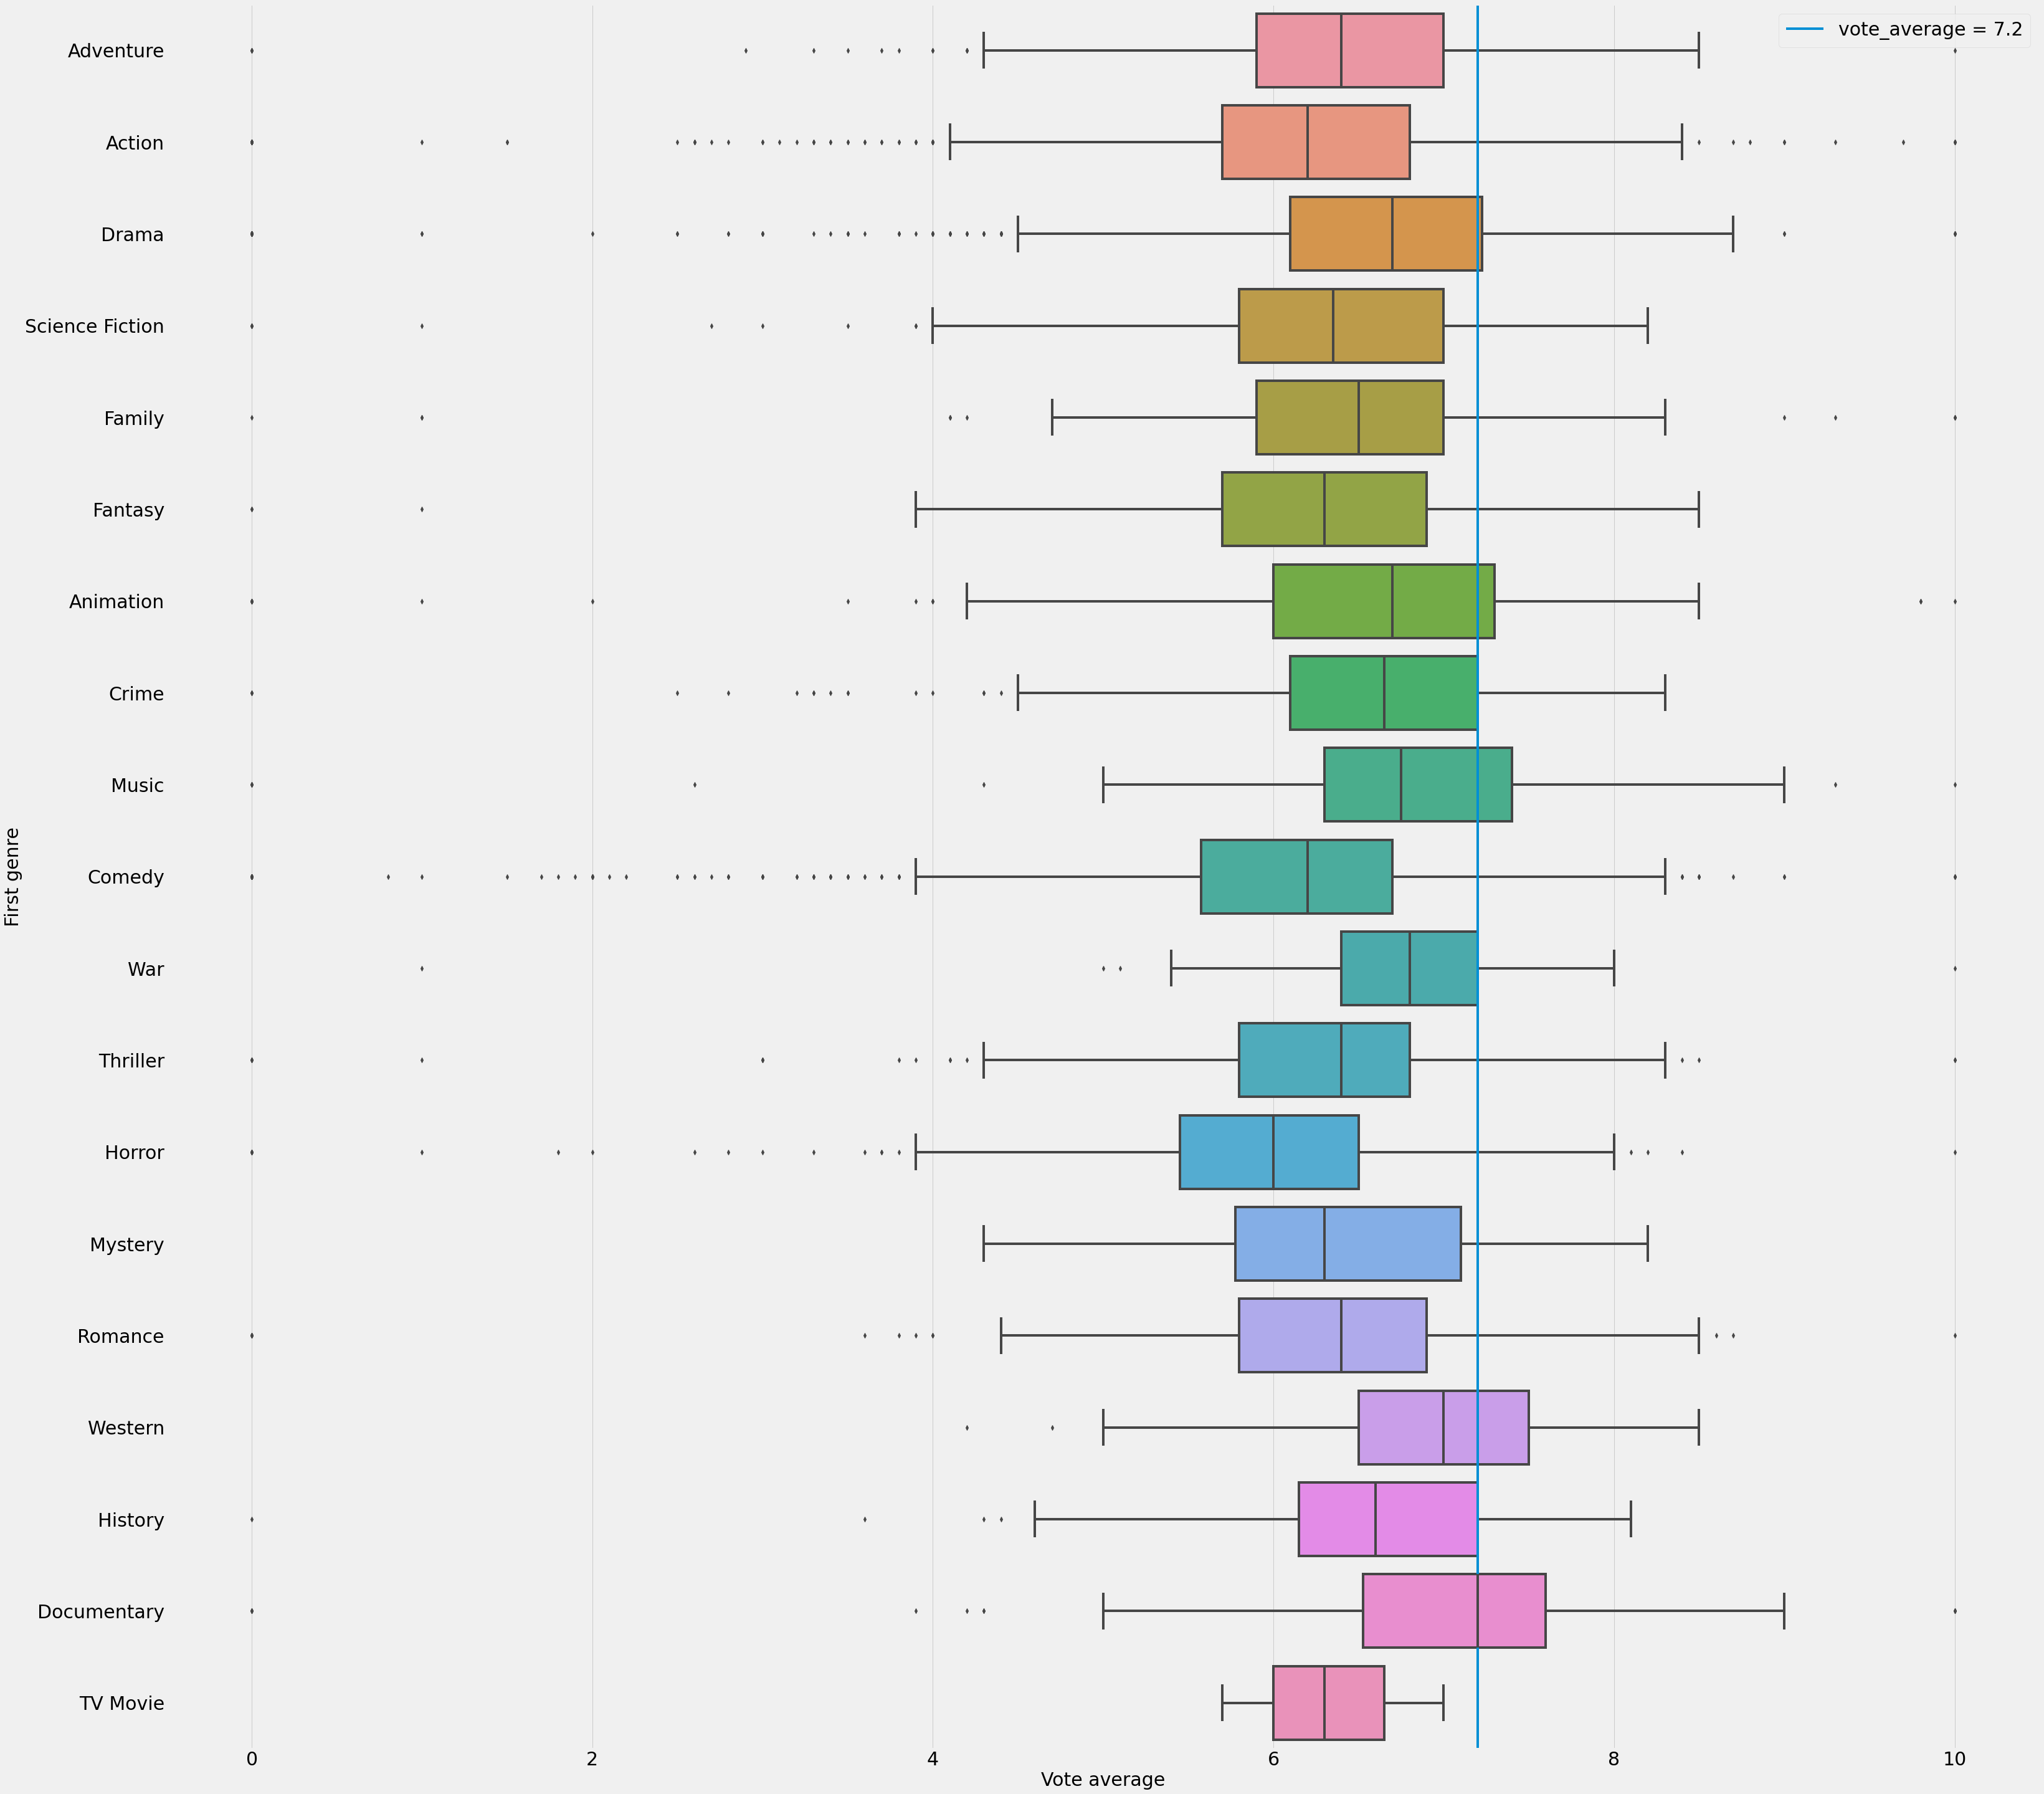

In [41]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "first_genre", data = categoricalmoviedata, orient = "h")
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("Vote average",fontsize=30)
ax.set_ylabel("First genre",fontsize=30)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=30)
plt.show()

From the data, we see that the comedy genre has one of the lower vote averages, and Western has one of the higher vote averages. However, predicting via the first genre is still quite unreliable as multiple genres are attached to the movie and we are not sure as to how they are arranged so we will not use genre to predict if a movie is "good".